In [1]:
from dataset_analysis import *
from XMLAnnotParser import parse_single_annotation_file
from tqdm import tqdm

# Test

In [2]:
annotations_top_dir = './annotation'
# dataset_dict_list = get_all_dicts(annotations_top_dir)

In [3]:
annotation_path = './annotation/h30_5_10/DJI_0002.xml'

In [4]:
xml_dict = parse_single_annotation_file(xml_path=annotation_path)

# Statistics

In [5]:
total_video_sequences = count_sequences(annotations_top_dir)

total_category_distribution_frame_level_dict = {}

total_outside_distribution_frame_level_dict = {}
total_occlusion_distribution_frame_level_dict = {}

total_altitude_distribution_frame_level_dict = {}
total_illumination_distribution_frame_level_dict = {}
total_keep_out_distribution_frame_level_dict = {}
total_cam_movement_distribution_frame_level_dict = {}
total_scene_distribution_frame_level_dict = {}

In [6]:
annotations_top_dir = './annotation'

In [7]:
attribute_map_dict = {
    842:"altitude",
    844:"illumination",
    846:"unknown1", # not_keep_out
    848:"camera movement",
    849:"scene",

}

In [8]:
for count,xml_dict in enumerate(annotations_dict_generator(annotations_top_dir)):
    # if count >= 30:
    #     break # for debug only
    # frame-level category distribution--------------------------------------------------------------------
    category_count_frame_level_dict = count_category_occurrences_frame_level_per_sequence(xml_dict)
    total_category_distribution_frame_level_dict = merge_dicts(
        total_category_distribution_frame_level_dict,
        category_count_frame_level_dict
    )
    # frame-level attribute distribution--------------------------------------------------------------------
    outside_distribution_frame_level_dict,\
    occlusion_distribution_frame_level_dict,\
    altitude_distribution_frame_level_dict,\
    illumination_distribution_frame_level_dict,\
    keep_out_distribution_frame_level_dict,\
    cam_movement_distribution_frame_level_dict,\
    scene_distribution_frame_level_dict = count_attribute_occurrence_frame_level_per_sequence(xml_dict)


    total_outside_distribution_frame_level_dict = merge_dicts(total_outside_distribution_frame_level_dict,outside_distribution_frame_level_dict)
    total_occlusion_distribution_frame_level_dict = merge_dicts(total_occlusion_distribution_frame_level_dict,occlusion_distribution_frame_level_dict)
    total_altitude_distribution_frame_level_dict = merge_dicts(total_altitude_distribution_frame_level_dict,altitude_distribution_frame_level_dict)
    total_illumination_distribution_frame_level_dict = merge_dicts(total_illumination_distribution_frame_level_dict,illumination_distribution_frame_level_dict)
    total_keep_out_distribution_frame_level_dict = merge_dicts(total_keep_out_distribution_frame_level_dict,keep_out_distribution_frame_level_dict)
    total_cam_movement_distribution_frame_level_dict = merge_dicts(total_cam_movement_distribution_frame_level_dict,cam_movement_distribution_frame_level_dict)
    total_scene_distribution_frame_level_dict = merge_dicts(total_scene_distribution_frame_level_dict,scene_distribution_frame_level_dict)

annotation files iterator progress: : 100%|██████████| 10/10 [00:01<00:00,  7.03it/s]


In [9]:
total_video_sequences

75

In [10]:
total_category_distribution_frame_level_dict

{'person': 1483758, 'cycle': 127341, 'car': 1808538}

In [11]:
total_altitude_distribution_frame_level_dict

{'120m': 554610, '30m': 350910, '60m': 798428, '90m': 409944}

In [12]:
total_illumination_distribution_frame_level_dict

{'bright_light': 2111209, 'weak_light': 2683}

In [13]:
total_occlusion_distribution_frame_level_dict

{'0': 3351045, '1': 68592}

In [14]:
total_outside_distribution_frame_level_dict

{'0': 702048, '1': 2717589}

In [15]:
total_keep_out_distribution_frame_level_dict

{'not_keep_out': 1966508, 'keep_out': 146994, 'shake': 390}

In [16]:
total_cam_movement_distribution_frame_level_dict

{'not_shake': 2106969, 'shake': 6923}

In [17]:
total_scene_distribution_frame_level_dict

{'street': 1774360, 'stadium': 339532}

In [18]:
count_error_files(annotations_top_dir)

45

# Visualize Results

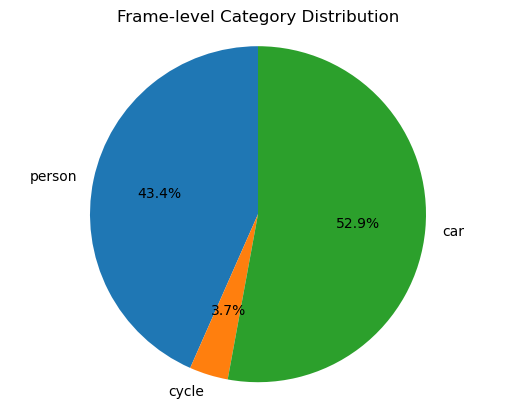

In [19]:
draw_pie_chart(total_category_distribution_frame_level_dict, title="Frame-level Category Distribution")

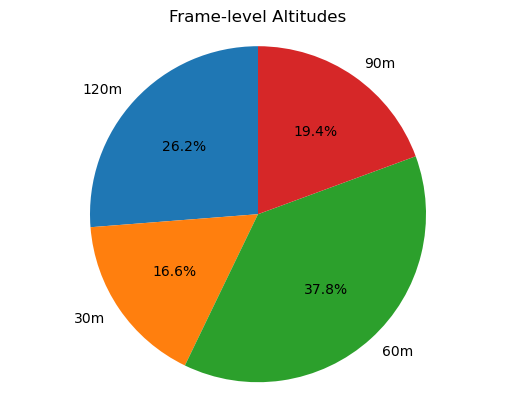

In [20]:
draw_pie_chart(total_altitude_distribution_frame_level_dict, title="Frame-level Altitudes")

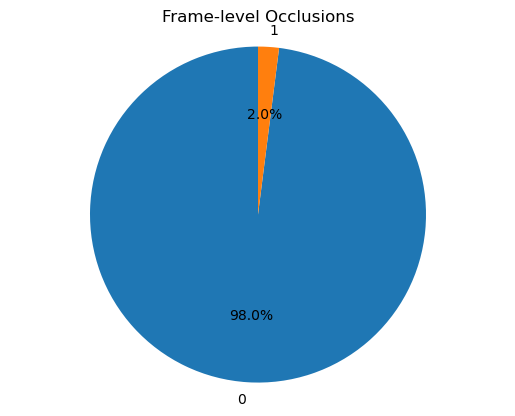

In [21]:
draw_pie_chart(total_occlusion_distribution_frame_level_dict, title="Frame-level Occlusions")

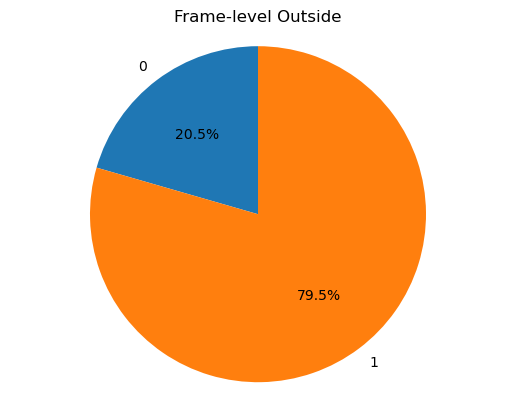

In [22]:
draw_pie_chart(total_outside_distribution_frame_level_dict, title="Frame-level Outside")

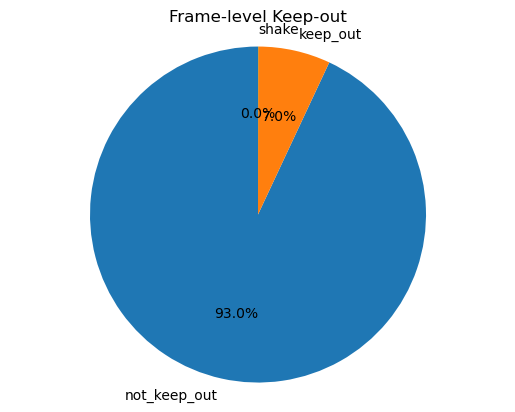

In [23]:
draw_pie_chart(total_keep_out_distribution_frame_level_dict, title="Frame-level Keep-out")

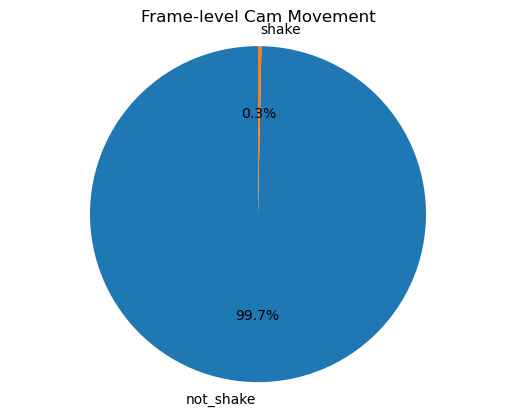

In [24]:
draw_pie_chart(total_cam_movement_distribution_frame_level_dict, title="Frame-level Cam Movement")

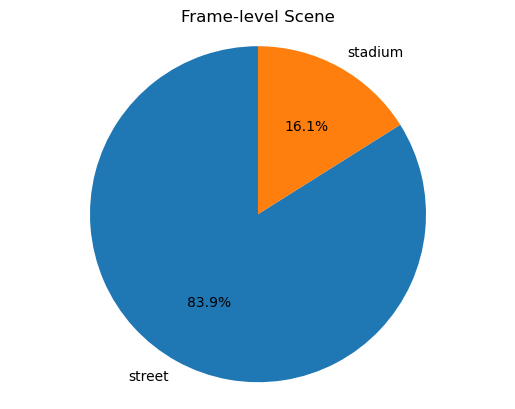

In [25]:
draw_pie_chart(total_scene_distribution_frame_level_dict, title="Frame-level Scene")